In [174]:
from astropy.io import fits
import numpy as np
import astropy
from astropy.table import Table
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats 
from scipy.optimize import curve_fit

from matplotlib.backends.backend_pdf import PdfPages

In [214]:
file_path = '/home/arya/Desktop/Det_gain_offset_merged_data/det1/pixel_fit_parameters_det1.fits'
hdulist = fits.open(file_path)

In [216]:
data = hdulist[1].data
print(Table(data))

Pixel Number         gain               offset      
------------ -------------------- ------------------
           1 0.054118452488483744 11.618596743561696
           2 0.053815910670558575 11.301050996787444
           3  0.05368061576155816 10.142341747309604
           4  0.05232635597177816 11.779519003581711
           5  0.05437401884054349 10.275655089576208
           6   0.0530684020321085 10.875951408762448
           7  0.05311326395829146  9.961144300824676
           8  0.05331728775954743  7.091944525372904
           9  0.05402904790117277  7.553859242605193
          10  0.05391923575128242  7.099957815890658
         ...                  ...                ...
         247 0.051498317492421126  8.840247989230658
         248 0.052772518816500996  8.233766764413744
         249  0.05331235977260312  6.954093460517545
         250 0.051352735218417093  8.937092759083152
           0  0.05494399804772553 10.349592571908275
          81  0.05371642257374861  12.53365893

det id = 1


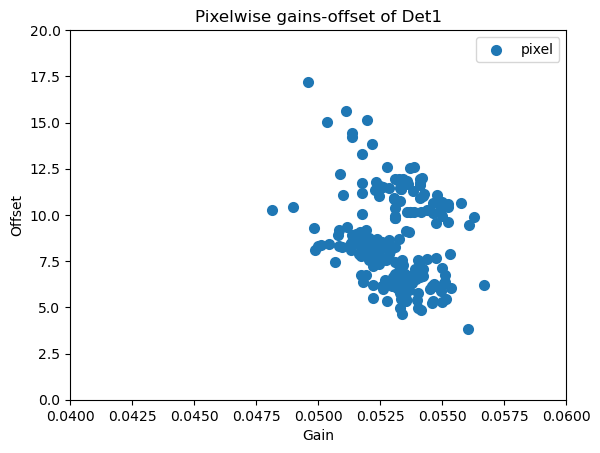

In [230]:
plt.scatter(data['gain'],data["offset"], lw=2, label= "pixel")
plt.ylim(0,20)
plt.xlim(0.04,0.06)
det_id = input("det id =")
# Add labels and title
plt.xlabel('Gain')
plt.ylabel('Offset')
plt.title(f'Pixelwise gains-offset of Det{det_id}')
plt.legend()

# Show the plot
plt.savefig('gain-offset_plot.pdf', format='pdf')

array([3.75766893e+01, 5.30704495e-02, 1.40432468e-03])

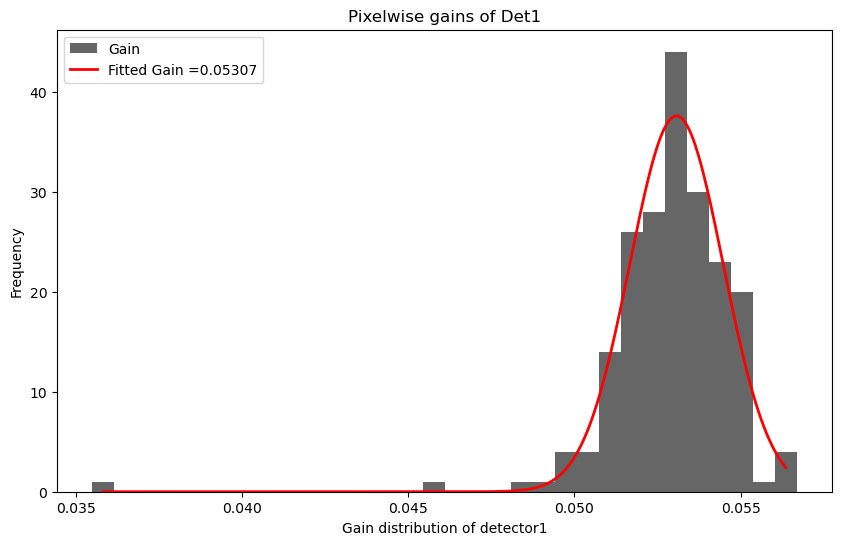

In [220]:
N, bins = np.histogram(data["gain"], bins= 32)
bin_centers = (bins[:-1] + bins[1:]) / 2

def gauss(x,amp,mean,stdev):
    return amp*np.exp(-(x-mean)**2/(2*stdev**2))


# Initialize variables for fitting
p0 = [np.max(N), np.mean(data['gain']), np.std(data['gain'])]
params = None
pcov = None
        
for i in range(10):
    try:
        # Fit the Gaussian function to the histogram data
        params, pcov = curve_fit(gauss, bin_centers, N, p0, maxfev=200)
        
        # Check if the change in parameters is within the acceptable range
        if np.all((np.abs(p0 - params) / np.sqrt(np.diag(pcov))) >1):
            break
        
        # Update initial guess for next iteration
        p0 = params
    except RuntimeError:
        # If the fit fails, continue to the next iteration
        continue
# Step 5: Plot the histogram and the fitted Gaussian curve
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(data["gain"], bins=32, alpha=0.6, color='k', label= "Gain")

# Plot the Gaussian fit
x_fit = np.linspace(bin_centers[0], bin_centers[-1], 1000)
y_fit = gauss(x_fit, *params)
label_text = f'Fitted Gain ={params[1]:.4g}'
plt.plot(x_fit, y_fit, color='r', lw=2, label=label_text)
# plt.xlim(0.04,0.06)



# Add labels and title
plt.xlabel(f'Gain distribution of detector{det_id}')
plt.ylabel('Frequency')
plt.title(f'Pixelwise gains of Det{det_id}')
plt.legend()
# Show the plot
plt.savefig('fitted_gain_plot.pdf', format='pdf')
params

array([37.69251388,  8.1946438 ,  2.67712245])

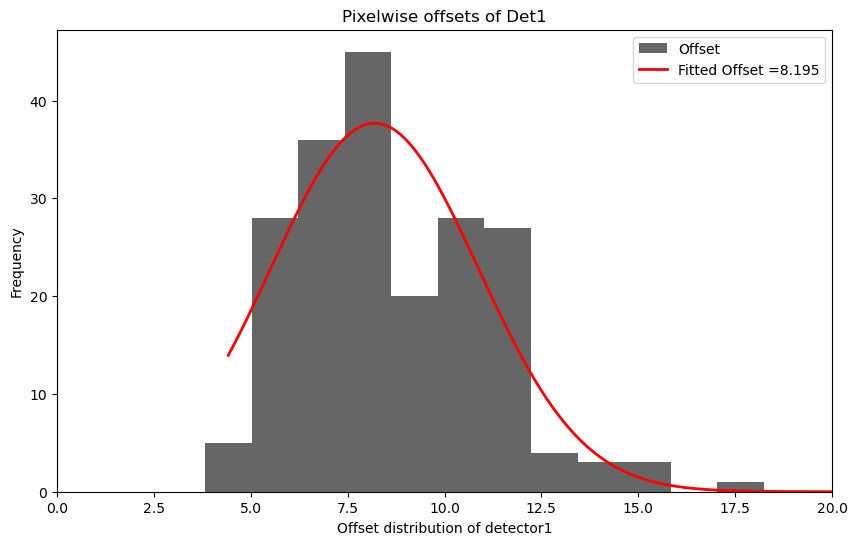

In [222]:
N, bins = np.histogram(data["offset"], bins= 32)
bin_centers = (bins[:-1] + bins[1:]) / 2

def gauss(x,amp,mean,stdev):
    return amp*np.exp(-(x-mean)**2/(2*stdev**2))


# Initialize variables for fitting
p0 = [np.max(N), np.mean(data['offset']), np.std(data['offset'])]
params = None
pcov = None
        
for i in range(10):
    try:
        # Fit the Gaussian function to the histogram data
        params, pcov = curve_fit(gauss, bin_centers, N, p0, maxfev=200)
        
        # Check if the change in parameters is within the acceptable range
        if np.all((np.abs(p0 - params) / np.sqrt(np.diag(pcov))) >1):
            break
        
        # Update initial guess for next iteration
        p0 = params
    except RuntimeError:
        # If the fit fails, continue to the next iteration
        continue
# Step 5: Plot the histogram and the fitted Gaussian curve
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(data["offset"], bins=32, alpha=0.6, color='k', label= "Offset")

# Plot the Gaussian fit
x_fit = np.linspace(bin_centers[0], bin_centers[-1], 1000)
y_fit = gauss(x_fit, *params)
label_text = f'Fitted Offset ={params[1]:.4g}'
plt.plot(x_fit, y_fit, color='r', lw=2, label=label_text)
plt.xlim(0,20)



# Add labels and title
plt.xlabel(f'Offset distribution of detector{det_id}')
plt.ylabel('Frequency')
plt.title(f'Pixelwise offsets of Det{det_id}')
plt.legend()
# Show the plot
plt.savefig('fitted_offset_plot.pdf', format='pdf')
params

In [212]:
4095*0.0555+7.5

234.7725